### Steps to Implement Logistic Regression

### 1. Import Libraries:

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### 2. Generate Data:

In [43]:
# Sample data: [Hours studied, Hours slept, Pass(1)/Fail(0)]
data = np.array([
    [2, 9, 0], [3, 7, 0], [4, 8, 0], [5, 6, 1], 
    [6, 7, 1], [7, 5, 1], [8, 6, 1], [9, 5, 1],
    [10, 4, 1], [11, 3, 1]
])

# Separate features (X) and target (y)
X = data[:, :2]  # First two columns
y = data[:, 2]   # Last column

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 8
Test samples: 2


### 3. Train Logistic Regression Model:

In [45]:
# Create logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

### 4. Make Predictions:

In [47]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

print("Predicted classes:", y_pred)
print("Predicted probabilities:\n", y_pred_proba)

Predicted classes: [1 0]
Predicted probabilities:
 [[0.00106297 0.99893703]
 [0.67808583 0.32191417]]


### 5. Calculate Accuracy:

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### 6. Visualize Results:

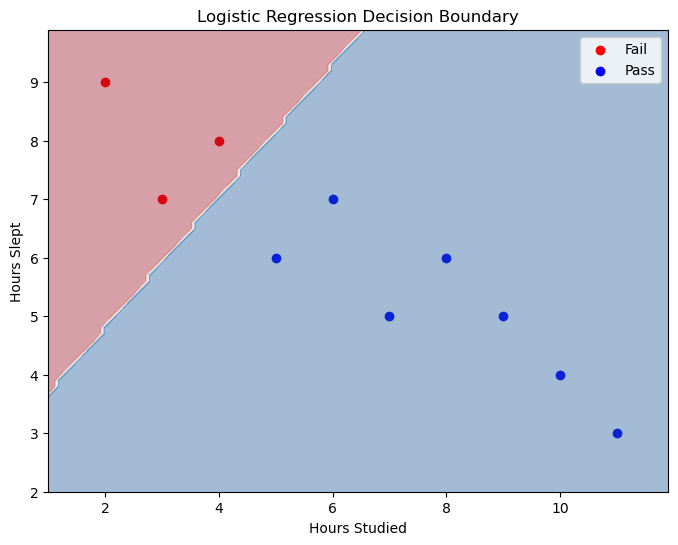


New student prediction: Fail
Probability of passing: 0.34


In [51]:
# Visualize decision boundary without mlxtend
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Fail')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Pass')

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Example prediction
new_student = np.array([[4, 8]])  # Hours studied, Hours slept
prediction = model.predict(new_student)
probability = model.predict_proba(new_student)[0][1]

print(f"\nNew student prediction: {'Pass' if prediction[0] == 1 else 'Fail'}")
print(f"Probability of passing: {probability:.2f}")